# Unsupervised Learning: Clustering Lab





In [1]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from scipy.io import arff

## 1. Initial practice with the K-means and HAC algorithms

### 1.1 (10%) K-means
Run K-means on this [Abalone Dataset.](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)
The dataset was modified to be smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points are commented out. Treat the output class (last column) as an additional input feature. Create your K-Mmeans model with the paramaters K-means(n_clusters=3, init='random', n_init=1)

Output the following:
- Class label for each point (labels_)
- The k=3 cluster centers (cluster_centers_)
- Number of iterations it took to converge (n_iter_)
- Total sum squared error of each point from its cluster center (inertia_)
- The total average silhouette score (see sklearn.metrics silhouette_score)

In [ ]:
# K-means with Abalone
#import the data from arff file into a numpy array of floats
Data_Set = arff.loadarff('abalone.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
X = Data_Set_np.astype(float)
X[:,7] /= np.max(X[:, 7])

kmeans = KMeans(n_clusters=3, init='random', n_init=1).fit(X)
print("Labels for each point:", kmeans.labels_)
print()
print("Cluster Centers", kmeans.cluster_centers_)
print()
print("Iterations Until Convergence:", kmeans.n_iter_)
print("Total sum squared error of each point", kmeans.inertia_)
print("Total average silhouette score: ", silhouette_score(X, kmeans.labels_))

Labels for each point: [0 0 2 0 0 0 2 2 0 2 0 0 0 2 0 2 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 0 2
 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 0 0 2 0 2 2
 2 2 2 2 2 2 2 1 2 1 2 2 2 2 0 2 2 2 2 2 1 1 2 0 0 0 0 2 2 2 2 2 2 2 0 0 0
 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 2 2 1 2 0 0 0 0
 0 0 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2 2 0 0 0 0 0 2 2 1 2 2 1
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2]

Cluster Centers [[0.40147727 0.30971591 0.09965909 0.35285795 0.14811932 0.07932955
  0.11301136 0.38474026]
 [0.67636364 0.53681818 0.18863636 1.72547727 0.63627273 0.346
  0.61006818 0.77272727]
 [0.57       0.45005556 0.15605556 0.95726111 0.38193889 0.21392222
  0.30229444 0.57089947]]

Iterations Until Convergence: 10
Total sum squared error of each point 15.145978053693106
Total average silhouette score:  0.5132580590953618


*Discussion*

For this problem, I first normalized that data in the last column. This made each feature between 0 and 1 so that they all had a similar effect on the Euclidean distance. Then, using the Abalone data set, I ran the Scikit-Learn k-Means clustering algorithm on it, with a total of three clusters. The output of the code is above. It had 3 8-dimensional centers (since there were 8 features in the data set) and took 11 iterations to converge. The total sum squared error was 15.142 and the silhouette score is 0.504. This was the first time I ran the model. So, I don't have much to compare it to. But, overall, the silhouette score felt quite low. I beleive that we can make modifications on the algorithm to improve it.

### 1.2 (10%) Hierarchical Agglomerative Clustering (HAC)

Run HAC on the same [Abalone Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff) using complete linkage and k=3.

Output the following:
- Class label for each point (labels_)
- The total average silhouette score

In [ ]:
# HAC with Abalone
hac = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)
print("Labels for each point:", hac.labels_)
print()
print("Total average silhouette score: ", silhouette_score(X, hac.labels_))

Labels for each point: [1 2 1 1 2 2 1 1 1 1 1 2 1 1 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0 1 0 0 2 1
 2 1 2 2 1 2 2 2 2 1 2 2 1 1 2 1 2 2 1 2 1 2 1 2 1 1 2 1 2 1 1 1 2 1 2 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 2 2 1 2 1 1 1 1 1 1 1 1 2 1
 2 2 2 1 1 1 2 1 2 2 2 1 2 2 2 2 2 0 0 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2
 2 2 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1]

Total average silhouette score:  0.47260940870717727


*Discussion*

This time I ran the HAC (agglomerative clustering model) on the same data set. I used a complete linkage. This means that the clusters were created by measuring the distances between the farthest nodes. So, the clusters were more compact. I was surprised to see that this model only had about 10-15 instances of the 0 label. This was much less than the other two labels. And, it was different than Kmeans since that algorithm yielded similar counts for each label. Furthermore, the total average silhouette score was 0.47. This is a little less than the Kmeans algorithm. So, this model may not be as accurate for this specific data set.

## 2. K-means Clustering with the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)
Use the Iris data set for 2.1 and 2.2.  Don't include the output label as one of the input features.

### 2.1 (20%) K-means Initial Centroids Experiments
K-means results differ based on the initial centroids used.
- Run K-means 5 times with *k*=4, each time with different initial random centroids (init="random) and with n_init=1.  Give inertia and silhouette scores for each run and discuss any variations in the results.
- SKlearn has a parameter that does this automatically (n_init).  n_init = z runs K-means z times, each with different random centroids and returns the clustering with the best SSE (intertia) of the z runs. Try it out and discuss how it does and how it compares with your 5 runs above.
- Sklearn also has a parameter (init:'K-means++') which runs a simpler fast version of K-means first on the data to come up with good initial centroids, and then runs regular K-means with this centroids.  Try it out (with n_init = 1) and discuss.

In [ ]:
# K-means initial centroid experiments
#import the data from arff file into a numpy array of floats
Data_Set = arff.loadarff('iris.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
X = Data_Set_np[:,:-1]
X = X.astype(float)

print("____________________________________________________________")
for i in range(1, 6):
    kmeans = KMeans(n_clusters=4, init='random', n_init=1).fit(X)
    print(f"K-means with random centroid #{i}")
    print("Total sum squared error of each point", kmeans.inertia_)
    print("Total average silhouette score: ", silhouette_score(X, kmeans.labels_))
    print()

print("____________________________________________________________")
kmeans = KMeans(n_clusters=4, init='random', n_init=5).fit(X)
print(f"Best Clustering with Ski-learn automatic implementation")
print("Total sum squared error of each point", kmeans.inertia_)
print("Total average silhouette score: ", silhouette_score(X, kmeans.labels_))
print()

print("____________________________________________________________")
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=1).fit(X)
print(f"Clustering after using algorithm to start with good centroids")
print("Total sum squared error of each point", kmeans.inertia_)
print("Total average silhouette score: ", silhouette_score(X, kmeans.labels_))

____________________________________________________________
K-means with random centroid #1
Total sum squared error of each point 57.317873214285704
Total average silhouette score:  0.4978256901095472

K-means with random centroid #2
Total sum squared error of each point 57.47327326549492
Total average silhouette score:  0.49511999553021513

K-means with random centroid #3
Total sum squared error of each point 57.47327326549492
Total average silhouette score:  0.49511999553021513

K-means with random centroid #4
Total sum squared error of each point 57.35501904761904
Total average silhouette score:  0.4962850920616641

K-means with random centroid #5
Total sum squared error of each point 71.34044682436699
Total average silhouette score:  0.4171050599264815

____________________________________________________________
Best Clustering with Ski-learn automatic implementation
Total sum squared error of each point 57.317873214285704
Total average silhouette score:  0.4978256901095472

____

Results and Discussion

This time, using the Iris data set, I ran the K-means clustering algorithm 5 times, each with random starting centroids. The total sum squared error ended up being around 57.35 or 71.3 for each iteration. And, the silhouette scores were either 0.419 or 0.497. This means that the effectiveness of the clustering is dependent on the initial locations of the centroids. So, it is good practice to do it multiple times to determine the most optimal clusterings.

Secondly, I used the standard Sklearn implementation to do this model 5 times and return the one with the lowest total sum squared error. As expected, the total sum squared error was about 57.35 and the total average silhouette score was 0.497. These values matched the best scores of our own method.

Finally, I used the Sklearn "K-means++" algorithm. This used a greedy algorithm to try and determine the most optimal location to place the initial centroids. This method yielded a similar total sum squared error and total average silhouette score as the previous method. I was not surprised to see that these method yielded good results since the initial centroids were placed in optrimal locations. But, I was surprised to see that the improvement was not much better than the previous method. So, if the K-means++ algorithm is computationallly ineffecieint, it may not be worth it.

### 2.2 (20%) Silhouette Graphs
In this part you will show silhouette graphs for different *k* values.  Install the [Yellowbrick visualization package](https://www.scikit-yb.org/en/latest/quickstart.html) and import the [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).  This library includes lots of visualization packages which you might find useful. (Note: The YellowBrick silhouette visualizer does not currently support HAC).
- Show Silhouette graphs for clusterings with *k* = 2-6. Print the SSE (inertia) and total silhouette score for each.
- Learn with the default n_init = 10 to help insure a decent clustering.
- Using the silhouette graphs, choose which *k* you think is best and discuss why. Think about and discuss more than just the total silhouette score.

__________k=2__________
Total sum squared error of each point 152.36870647733906
Total average silhouette score:  0.6808136202936816


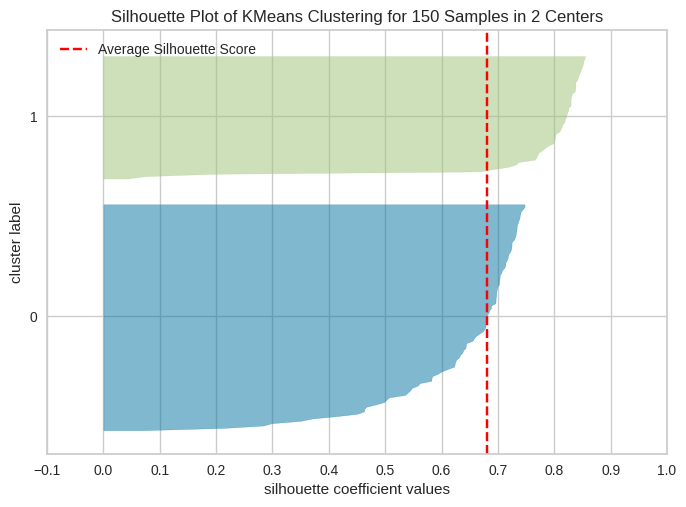

__________k=3__________
Total sum squared error of each point 78.940841426146
Total average silhouette score:  0.5525919445499757


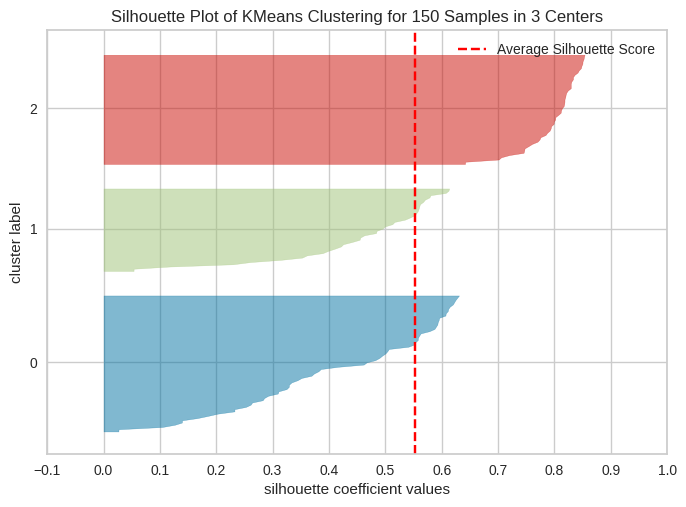

__________k=4__________
Total sum squared error of each point 57.35501904761904
Total average silhouette score:  0.4962850920616641


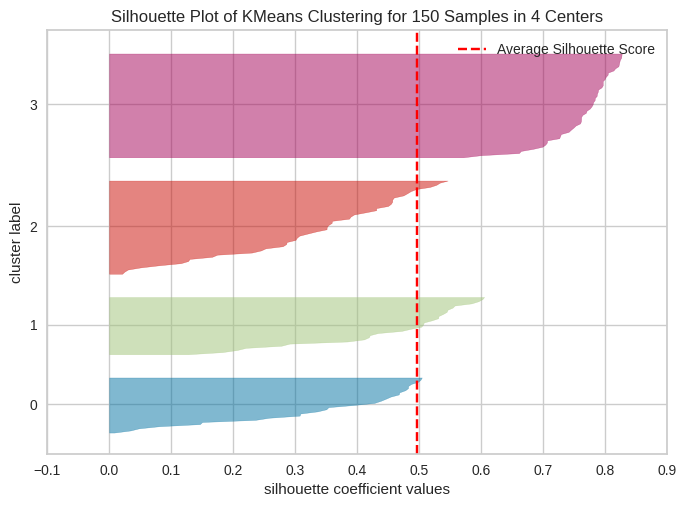

__________k=5__________
Total sum squared error of each point 46.53558205128205
Total average silhouette score:  0.4885175508886279


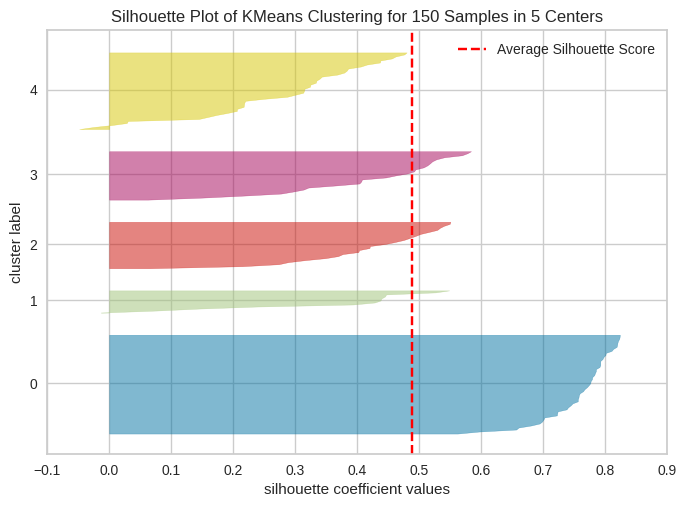

__________k=6__________
Total sum squared error of each point 39.251830892636775
Total average silhouette score:  0.36339909677539595


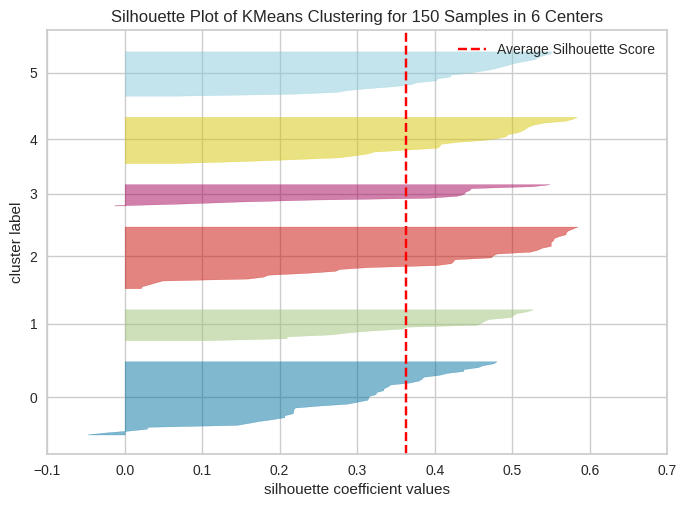

In [ ]:
# Iris Clustering with K-means and silhouette graphs
from yellowbrick.cluster import SilhouetteVisualizer

# model = KMeans(5, random_state=42)

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, init='random', n_init=10)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X)        # Fit the data to the visualizer
    print(f"__________k={k}__________")
    print("Total sum squared error of each point", kmeans.inertia_)
    print("Total average silhouette score: ", silhouette_score(X, kmeans.labels_))
    visualizer.show()        # Finalize and render the figure

Discuss your results and justify which clustering is best based on the silhouette graphs

This time, I ran the model 5 different times, with various k-values (each taking the best of 10 iterations). Each time, I printed out the SSE and silhouette scores. To my surprise, the model with two clusters had the highest silhouette score (at 0.681). And, the graph showed that both clusters had large silhouette scores at each point. The models with 3-5 clusters had a score of around 0.5. And, each graph had one cluster with high scores and the rest with lower. Finally, the model with 6 clusters had another dropoff with a silhouette score of only 0.37. And, in the graph all clusterings had similar average scores but large ranges among their points.

This data helped me understand that for this specific set, two clusters is the most optimal number. It maximizes the differences between the clusterings. I think that adding more clusters forces the model to split data that was already set into natural clusters. This lowers the silhouette score. But, I was surprised that this number was 2 and not 3 (since the original data set had three unique classifications).

Another thing I noticed is that although the silhouette scores increased as k increased, the sum squared error actually decreased. I was surprised at first. But, after further analysis, it makes sense. The sum squared error measures how tight each clustering is. So, it makes sense that with more clusters, the points are closer to the centroids. But, this does not mean that more clusters is better since the separablility between clusters decreases.

## 3 (20%) Iris Clustering with HAC

- Use the same dataset as above and learn with HAC clustering
- Create one table with silhouette scores for k=2-6 for each of the linkage options single, average, complete, and ward

In [ ]:
#HAC with Iris
from tabulate import tabulate
table_data = [["k", "Linkage",	"Silhouette Score"]]

# Run the model
for k in range(2, 7):
    for linkage in ["single", "complete", "average", "ward"]:
        hac = AgglomerativeClustering(n_clusters=k, linkage=linkage).fit(X)
        table_data.append([k, linkage, silhouette_score(X, hac.labels_)])
    table_data.append([])  # To separate into sections

# Make the table
table = tabulate(table_data, headers="firstrow")
print(table)

  k  Linkage      Silhouette Score
---  ---------  ------------------
  2  single               0.686393
  2  complete             0.51606
  2  average              0.686393
  2  ward                 0.686393

  3  single               0.511839
  3  complete             0.51335
  3  average              0.553934
  3  ward                 0.554097

  4  single               0.281778
  4  complete             0.499574
  4  average              0.471665
  4  ward                 0.48874

  5  single               0.283484
  5  complete             0.349998
  5  average              0.430342
  5  ward                 0.484155

  6  single               0.221114
  6  complete             0.342052
  6  average              0.340659
  6  ward                 0.361885



*Discussion and linkage comparison*

Using the same dataset as above, this time I trained with HAC clustering. This time, I focused on the effects of various k-values and linkage technique (see above). The k-value of 2 yielded the highest silhouette scores. This was expected since the k-means algorithm was optimized at that k-value. The HAC algorithm actually had a slightly higher score at 0.686 instead of 0.68.

With the k-value at 2, single, average, and ward linkage are had similar silhouette scores. The complete linkage, which is based on the farthest distances between clusters, was not as good as the others. This likely means that the clusters are naturally more like long chains than compact hyperspheres.

One thing that did surprise me was that the optimal linakge method was different at each k-value. For example, with k=4, the single linkage had by far the lowest silhouette score at 0.28. And, with k=6, the complete linkage was just as highly scored as average and ward linkage. I think that this data changes as k changes since the number of clusters may alter the most effective cluster shapes. Overall, in order to cluster a dataset most effectively, all of these parameters must be taken into account.

## 4 (20%) Run both algorithms on a real world data
- Choose any real world data set which you have not used previously
- Use parameters of your choosing
- Try each algorithm a few times with different parameters and output one typical example of labels and silhouette scores for each algorithm
- Show the silhouette graph for at least one reasonable *k* value for K-means

In [ ]:
#import the data file, line by line
with open("letter.txt", "r") as file:
    data_set = file.read().splitlines()

#separate each line into a list and append to data
data = []
for line in data_set:
    data.append(line.split(","))

#convert the data into an array of floats
Data_Set_df = pd.DataFrame(data)
data = Data_Set_df.to_numpy()
X = data[:, 1:]     # Remove data about the class (since we are doing unsupervised learning)
X = X[:2000]     # Only use first 2500 inputs (to improve the speed)
X = X.astype(float)

_____________________k-Means Aglorithm_____________________

Typical Example:
Labels:  [9, 10, 11, 4, 8, 22, 8, 12, 2, 10, 22, 4, 3, 25, 1, 11, 20, 5, 13, 2, 2, 20, 8, 23, 2, 16, 19, 4, 23, 20, 18, 2, 5, 25, 19, 1, 1, 14, 3, 16, 11, 22, 17, 1, 9, 23, 21, 8, 25, 22, 25, 18, 24, 3, 22, 23, 12, 1, 13, 11, 15, 2, 22, 3, 20, 18, 20, 8, 25, 11, 11, 1, 3, 7, 17, 20, 20, 20, 12, 20, 5, 13, 10, 23, 24, 24, 3, 25, 19, 5, 25, 5, 21, 23, 15, 1, 1, 1, 15, 5, 9, 5, 23, 24, 2, 9, 14, 4, 1, 6, 17, 16, 13, 17, 23, 15, 8, 25, 12, 17, 17, 20, 11, 20, 11, 20, 3, 14, 19, 6, 12, 3, 8, 20, 12, 5, 11, 2, 5, 2, 13, 24, 8, 15, 12, 25, 9, 7, 9, 23, 0, 10, 3, 19, 0, 1, 8, 10, 11, 20, 5, 21, 14, 12, 16, 15, 23, 3, 5, 9, 1, 8, 25, 15, 13, 22, 2, 21, 13, 20, 13, 1, 15, 22, 14, 17, 20, 8, 13, 2, 25, 23, 3, 23, 19, 13, 1, 1, 5, 5, 13, 24, 17, 8, 20, 10, 3, 4, 9, 1, 24, 20, 11, 0, 2, 2, 12, 3, 2, 3, 6, 22, 16, 11, 1, 23, 0, 14, 11, 17, 19, 3, 12, 25, 12, 14, 2, 23, 9, 11, 5, 13, 9, 20, 13, 3, 8, 22, 16, 23, 0, 11, 1, 1

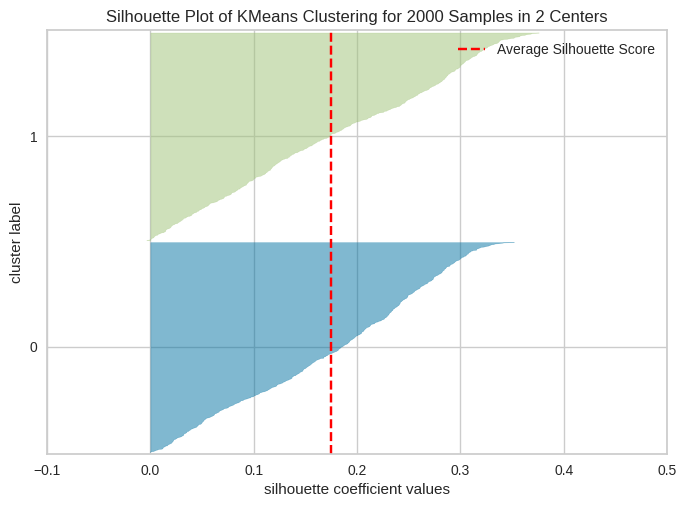

__________k=3__________
Total sum squared error of each point 126179.91738622205
Total average silhouette score:  0.16068075924646383


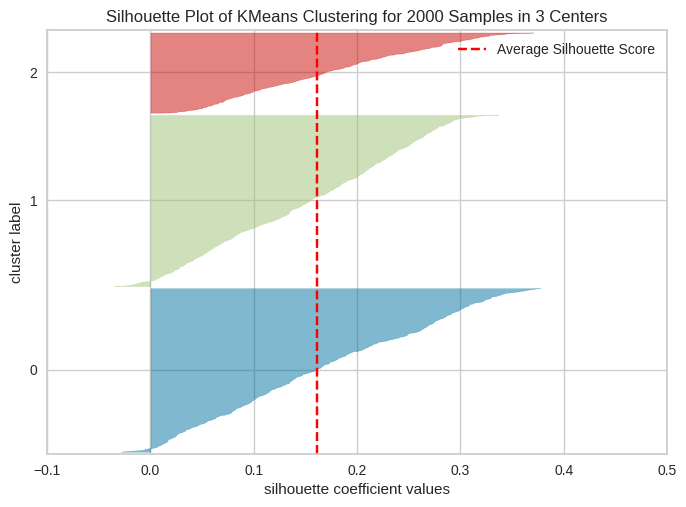

__________k=6__________
Total sum squared error of each point 101011.20552701788
Total average silhouette score:  0.15269524853803296


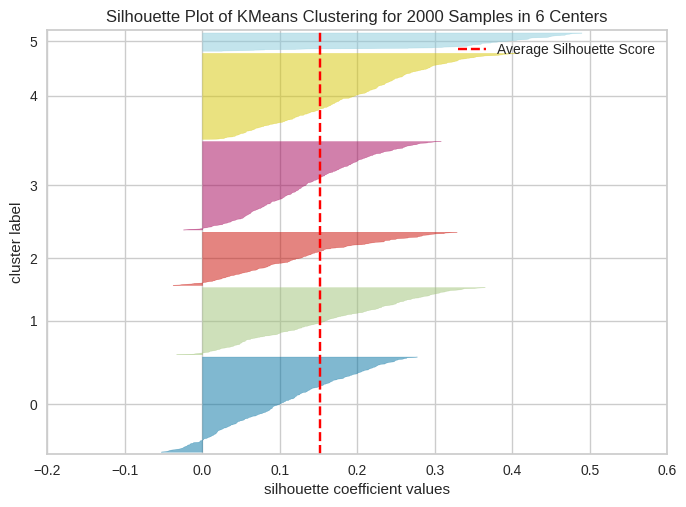

__________k=15__________
Total sum squared error of each point 73141.90165418424
Total average silhouette score:  0.15085033381964735


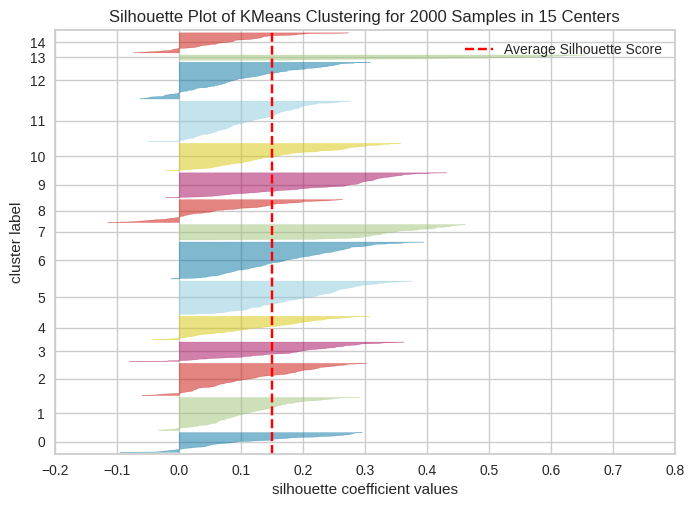

__________k=26__________
Total sum squared error of each point 59390.94163035701
Total average silhouette score:  0.15729934216352692


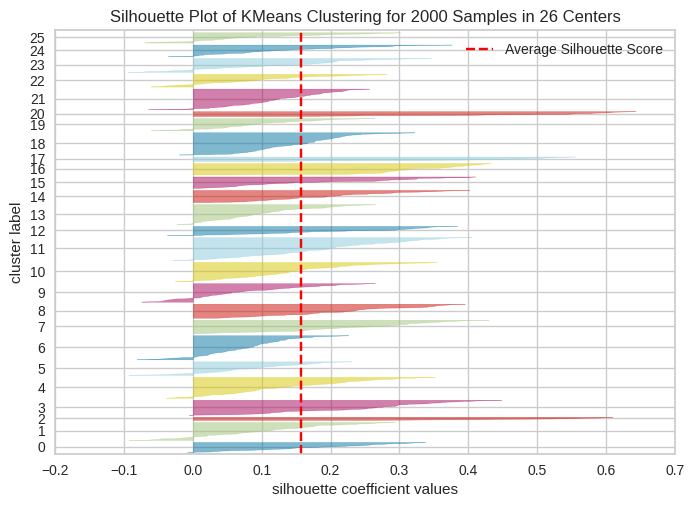

In [ ]:
# Run both algoriths on a data set of your choice
#_____________k-Means_____________
print("_____________________k-Means Aglorithm_____________________")
print()

print("Typical Example:")
kmeans = KMeans(n_clusters=26, init='k-means++', n_init=10).fit(X)
print("Labels: ", list(kmeans.labels_))
print("Silhouette Score: ", silhouette_score(X, hac.labels_))
print()

for k in [2, 3, 6, 15, 26]:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X)        # Fit the data to the visualizer
    print(f"__________k={k}__________")
    print("Total sum squared error of each point", kmeans.inertia_)
    print("Total average silhouette score: ", silhouette_score(X, kmeans.labels_))
    visualizer.show()        # Finalize and render the figure

In [ ]:
#_____________HAC_____________
table_data = [["k", "Linkage",	"Silhouette Score"]]

# Run the model
for k in [2, 3, 6, 15, 26]:
    for linkage in ["single", "complete", "average", "ward"]:
        hac = AgglomerativeClustering(n_clusters=k, linkage=linkage).fit(X)
        table_data.append([k, linkage, silhouette_score(X, hac.labels_)])
    table_data.append([])  # To separate into sections

# Make the table
table = tabulate(table_data, headers="firstrow")
print("______________________HAC Aglorithm______________________")
print()
print("Typical Example:")
hac = AgglomerativeClustering(n_clusters=26, linkage="ward").fit(X)
print("Labels: ", list(hac.labels_))
print("Silhouette Score: ", silhouette_score(X, hac.labels_))
print()
print(table)

______________________HAC Aglorithm______________________

Typical Example:
Labels:  [8, 1, 1, 4, 19, 12, 9, 2, 3, 1, 12, 4, 10, 10, 14, 1, 9, 6, 11, 3, 3, 14, 9, 16, 13, 20, 4, 4, 16, 14, 0, 3, 7, 10, 4, 14, 14, 22, 10, 20, 6, 14, 23, 14, 4, 12, 10, 9, 10, 12, 16, 0, 17, 24, 12, 16, 2, 14, 6, 0, 5, 21, 1, 16, 9, 0, 23, 9, 16, 1, 1, 14, 14, 18, 13, 14, 14, 4, 2, 15, 4, 6, 1, 16, 15, 15, 24, 10, 4, 7, 24, 11, 4, 14, 5, 16, 14, 14, 5, 7, 17, 6, 16, 17, 21, 8, 11, 4, 14, 15, 13, 20, 6, 13, 16, 5, 9, 10, 2, 7, 23, 15, 1, 9, 16, 21, 24, 11, 25, 19, 2, 4, 9, 21, 2, 7, 1, 3, 7, 13, 6, 17, 9, 5, 2, 10, 8, 2, 8, 16, 3, 1, 24, 25, 0, 14, 9, 1, 1, 14, 6, 4, 11, 2, 20, 5, 16, 14, 6, 8, 12, 9, 10, 5, 6, 12, 23, 4, 6, 14, 11, 12, 5, 12, 11, 13, 14, 9, 6, 3, 10, 14, 24, 16, 25, 6, 14, 12, 7, 7, 6, 17, 23, 9, 9, 1, 16, 6, 8, 12, 17, 9, 1, 3, 3, 23, 2, 9, 3, 16, 15, 12, 20, 6, 14, 14, 0, 11, 6, 13, 6, 24, 2, 24, 2, 11, 23, 14, 8, 6, 6, 6, 8, 15, 6, 24, 9, 12, 20, 16, 3, 1, 12, 14, 25, 6, 23, 24, 21, 14

*Discussion and comparison*

I found a dataset that provides information about images of various English letters. Its goal is to predict the letter that was written. Here is a link to the website where I got the data: https://archive.ics.uci.edu/dataset/59/letter+recognition

First, I ran the k-means neighbor on it. A typical set of labels and silhouette score are printed above. Also, I showed a typical set of labels that the model produced, using 10 iterations and the greedy method to optimize the initial centroid locations. Finally, I plotted a few silhouette graphs with various k-values.

In this experiment, the silhouette scores were much lower than expected. The k-value of 2 was the best. But, its score was only 0.175. Since I had prior knowledge that there are 26 letters in the English alphabet, a k-value of 26 seemed to be the most natural. The silhouette score decreased to 0.157. But, it is likely that this model more accurately classifies novel data. As shown in the graph, some clusters had very high scores while others were low. This makes sence because some letters are easier to identify than others.

Secondly, I ran the HAC model on the same data set. As I did above, I tested it on various k-values and linkages. To my surprise, a k-value of 2 had the highest silhouette scores. In specific, the single-linkage was the most accurate. However, when I printed out the labels for this k-value, all but one instances belonged to the same cluster. This means that the points are all pretty isolated. So, using my inductive bias, I set the k-value to 26. This decreased the silhoutte score to 0.12984 (using the ward linkage method). But, the labels were split much more evenely.

Overall, the k-Means model and HAC model each have their own advantages and disadvantages. And, they each have various hyperparemeters that must be accounted for to get the best model. But, I learned that clustering is not the best way to analyze this data set of English letters. If the data of the classes is given, supervised learning is much more accurate because it takes advantage of the data given. However, clustering was an effective way to divide the data into groups and may help us understand how to differentiate between various inputs.

## 5. Extra Credit for Coding Your Own Clustering Algorithms
### 5.1 (Optional 10% extra credit) Code up the K-means clustering algorithm
Below is a scaffold you could use if you want. As above, you only need to support numeric inputs, but think about how you would support nominal inputs and unknown values. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to choose *k* and specify the *k* initial centroids.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

### 5.2 (Optional 10% extra credit) Code up the HAC clustering algorithm

- Your model should support the methods shown in the example scaffold below.
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from *n* to 2.  You just need to output results for the curent chosen *k*.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

Discussion and comparision of each model implemented

In [153]:
from sklearn.base import BaseEstimator, ClassifierMixin, ClusterMixin

class KMEANSClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,debug=False):
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """

        # Initial centroids
        clusters = []
        if self.debug:    # If debug is true, start with first k instances
            for centroid in range(self.k):
                clusters.append(X[centroid])
        else:
            for centroid in range(self.k):
                cluster = []
                for column in range(len(X[0])):
                    # Find max and min in column to randomize cluster within the range
                    max = np.max(X[:, column])
                    min = np.min(X[:, column])
                    cluster.append(np.random.uniform(min, max))
                clusters.append(cluster)
        clusters = np.array(clusters)
        old_clusters = np.zeros_like(clusters) # Used to check to see if sufficient changes are made
        # print("initial clusters", clusters)

        # Adjust centroids until no changes are made
        while np.linalg.norm(clusters - old_clusters) > 0.0001:
            old_clusters = np.copy(clusters)
            # Find the closest centroid to each instance
            nearest_centroids = []
            for row in X:
                distances = []   # To keep track of the distance to each centroid
                for centroid in clusters:
                    distance = np.linalg.norm(row - centroid)  # Find ditance between the centroid and instance
                    distances.append(distance)
                nearest_centroid = np.argmin(distances)
                nearest_centroids.append(nearest_centroid)
            nearest_centroids = np.array(nearest_centroids)
            # print(nearest_centroids)

            # Adjust the centroids to the mean of the points closest to it
            for cluster in range(self.k):
                nearest_instances = []   # To dins the values of the entries close
                if cluster not in nearest_centroids: continue  # don't change centroid if not close to any point
                for centroid in range(len(nearest_centroids)):
                    if nearest_centroids[centroid] == cluster:
                        nearest_instances.append(X[centroid])
                nearest_instances = np.array(nearest_instances)
                clusters[cluster] = np.mean(nearest_instances, axis=0)

        self.clusters = clusters  # Add the clusters as a new attribute
        self.labels = nearest_centroids
        return self

    def print_labels(self): # Print the cluster label for each data point
        print(list(self.labels))  # Print as list so that everything is shown

In [169]:
# Test the class on the Iris data set

Data_Set = arff.loadarff('iris.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
X = Data_Set_np[:,:-1]
X = X.astype(float)

clf = KMEANSClustering(2, debug=False)
clf.fit(X)
print("Centroids:", clf.clusters)
print()
print("Labels:")
clf.print_labels()
print()
print("Silhouette Score: ", silhouette_score(X, clf.labels))

Centroids: [[5.00566038 3.36037736 1.56226415 0.28867925]
 [6.30103093 2.88659794 4.95876289 1.69587629]]

Labels:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Silhouette Score:  0.6808136202936816


In [168]:
# Test my function on a data set of my choice

with open("letter.txt", "r") as file:
    data_set = file.read().splitlines()

#separate each line into a list and append to data
data = []
for line in data_set:
    data.append(line.split(","))

#convert the data into an array of floats
Data_Set_df = pd.DataFrame(data)
data = Data_Set_df.to_numpy()
X = data[:, 1:]     # Remove data about the class (since we are doing unsupervised learning)
X = X[:2000]     # Only use first 2500 inputs (to improve the speed)
X = X.astype(float)

clf = KMEANSClustering(5, debug=False)
clf.fit(X)
print("Centroids:", clf.clusters)
print()
print("Labels:")
clf.print_labels()
print()
print("Silhouette Score: ", silhouette_score(X, clf.labels))

Centroids: [[ 1.91724138  2.52873563  2.91264368  2.21609195  1.3908046   7.07816092
   7.25977011  4.03218391  5.07586207  8.30114943  6.1908046   8.14482759
   1.89195402  8.08965517  2.67356322  8.07126437]
 [ 6.17682927 10.26422764  7.39634146  7.43089431  6.00609756  7.55081301
   6.99593496  4.18089431  4.9796748   8.54268293  5.88211382  7.87398374
   5.05081301  8.22764228  5.17682927  7.79878049]
 [ 3.6029654   7.14003295  4.73970346  5.59143328  3.24546952  7.25370675
   6.40032949  5.03953871  6.03294893  7.61779242  5.00988468  8.37561779
   2.28500824  7.75288303  4.63756178  8.14827018]
 [ 4.22589532  7.69972452  5.34435262  5.69972452  2.85950413  5.35812672
  10.36088154  3.35261708  5.06336088  9.73829201  9.48209366  7.06887052
   2.10192837  9.71349862  2.01652893  6.83471074]
 [ 3.66019417  6.52427184  4.2815534   5.53398058  2.44660194  7.48543689
   6.2815534  12.33009709  2.27184466  7.08737864  7.62135922  8.5631068
   4.50485437  7.58252427  0.19417476  8.12621

For this part of the project, I went ahead and wrote my own code to follow the K-Means algorithm. I let the user input the k-value, and whether or not to use random points to start. Then, the fit function randomly selects centroids within the bounds of the given input matrix. Next, the algorithm checks to see which inputs are closest to which centroid. After that, I wrote code to make the centroids change to be the mean of all the points that are closest to them. Finally, I had this algorithm run until the 2-norm of the difference between the two most recent clustering matrices was at an arbitrarily small value.

This code worked much better than I expected. On the Iris data set, the labels made sense and it had a silhouette score of 0.6808, which is practically the same as the standard sklearn implementation. And, for my data set on the English letters, the silhouette score was 0.14, which was also quite similar to the imported functions. There are many improvements I can do to my code to give it more hyperparemeters and limit user error. But, all in all, I came to realize that the algorithm is actually quite simple. My algorithm was almost just as effective as the sklearn one.

In [242]:

class HACClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,link_type='single'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """

        clusters = list(X)
        num_clusters = len(clusters)

        while num_clusters > self.k:
        # Create matrix of the linkages
            links = np.matrix(np.ones((num_clusters,num_clusters)) * np.inf)
            print(links)
            for i in range(num_clusters):
                for j in range(num_clusters):
                    if i >= j: continue # no need to calculate distance to itself or distances already calculated
                    distance = np.linalg.norm(clusters[i] - clusters[j])
                    links[i, j] = distance
            print(links)

            # Find the best clusters to merge
            min_distance = np.argmin(links)
            cluster1_num, cluster2_num = min_distance // len(links), min_distance % len(links)
            print(cluster1_num, cluster2_num)

            cluster2 = clusters[cluster2_num]
            clusters.pop(cluster2_num)
            clusters[cluster1_num] = np.row_stack((clusters[cluster1_num], cluster2))
            print(clusters)
            num_clusters = len(clusters)

        return self

    def print_labels(self): # Print the cluster label for each data point
        pass

In [245]:
X = np.array([[3, -1], [1, 2], [1.1, 2.1], [44, 2]])
clf = HACClustering(2)
clf.fit(X)

[[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]
[[        inf  3.60555128  3.63593179 41.10960958]
 [        inf         inf  0.14142136 43.        ]
 [        inf         inf         inf 42.90011655]
 [        inf         inf         inf         inf]]
1 2
[array([ 3., -1.]), array([[1. , 2. ],
       [1.1, 2.1]]), array([44.,  2.])]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
[[        inf  5.12054685 41.10960958]
 [        inf         inf 60.74059598]
 [        inf         inf         inf]]
0 1
[array([[ 3. , -1. ],
       [ 1. ,  2. ],
       [ 1.1,  2.1]]), array([44.,  2.])]


HACClustering(k=2)